# Обучение ML алгоритмов по информативным фичам из ВЭКГ:

In [91]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from pandas.core.common import SettingWithCopyWarning

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import random
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

random.seed(42)

In [2]:
df = pd.read_csv('all_data_for_ml.csv')
df

,Square_QRS_frontal,Square_QRS_sagittal,Square_QRS_axial,Square_ST_frontal,Square_ST_sagittal,Square_ST_axial,Angle_QRST,Frontal_Angle_QRST,FileID,Age,EF,Gender_f,Gender_m,class
0,8.336893e-07,7.278536e-07,2.149840e-06,2.610541e-10,1.051112e-09,9.567503e-11,112.662539,41.334788,1,76,73,1,0,0
1,7.402612e-07,3.468231e-07,6.847881e-07,8.926697e-09,1.980139e-09,6.931836e-08,62.462055,44.982961,2,83,74,0,1,0
2,6.833704e-07,3.611996e-07,8.641801e-07,6.151694e-09,7.288901e-09,5.949312e-10,2.624575,9.793879,3,77,75,0,1,0
3,5.245667e-07,4.037455e-08,1.574025e-07,3.046258e-09,8.787343e-09,1.717640e-08,126.061398,118.078544,4,56,78,0,1,0
4,1.370034e-07,1.116957e-07,1.134765e-06,9.371232e-09,3.066109e-09,2.493297e-08,136.553920,166.829706,5,55,78,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,2.882277e-07,6.787564e-07,6.910762e-07,3.220663e-09,9.055682e-09,2.478788e-08,129.570768,51.872633,336,68,29,0,1,1
261,2.769859e-07,1.667682e-07,2.417773e-08,4.595353e-09,2.492971e-10,2.097595e-08,130.471431,136.862002,337,58,29,0,1,1
262,4.595067e-07,3.152899e-07,5.008105e-07,2.863019e-08,1.049836e-08,8.825877e-08,107.037503,51.082878,339,59,39,0,1,1
263,1.530716e-07,3.684035e-07,4.671751e-07,9.574560e-10,3.704179e-09,3.771654e-09,157.240917,137.930779,341,62,33,0,1,1


---

# Классификация (болен/здоров)

### Преподготовка данных:

In [3]:
y = df['class']
X = df.drop(['FileID', 'EF', 'class'], axis=1)
print(f"Анализируются следующие {len(list(X.columns))} признаков: {list(X.columns)}")

Анализируются следующие 11 признаков: ['Square_QRS_frontal', 'Square_QRS_sagittal', 'Square_QRS_axial', 'Square_ST_frontal', 'Square_ST_sagittal', 'Square_ST_axial', 'Angle_QRST', 'Frontal_Angle_QRST', 'Age', 'Gender_f', 'Gender_m']


Распределение здоровых и больных: 

0 - здоров 1 - болен

In [4]:
y.value_counts()

1    176
0     89
Name: class, dtype: int64

Разделение на train/val:

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Распределение здоровых и больных на тесте:

In [6]:
y_test.value_counts()

1    44
0    23
Name: class, dtype: int64

In [7]:
# Выделим признаки для нормализации
features_to_normalize = ['Square_QRS_frontal', 'Square_QRS_sagittal', 'Square_QRS_axial', 
                         'Square_ST_frontal', 'Square_ST_sagittal', 'Square_ST_axial', 
                         'Angle_QRST', 'Frontal_Angle_QRST', 'Age']

# Создадим объект для стандартизации и подгоним его на тренировочных данных
scaler = StandardScaler()
scaler.fit(X_train[features_to_normalize])


with warnings.catch_warnings():
    # Отключаем предупреждения типа SettingWithCopyWarning
    warnings.simplefilter("ignore", category=SettingWithCopyWarning)

    # Нормализуем признаки на тренировочном и валидационном наборах
    X_train[features_to_normalize] = scaler.transform(X_train[features_to_normalize])
    X_test[features_to_normalize] = scaler.transform(X_test[features_to_normalize])


In [8]:
X_train

,Square_QRS_frontal,Square_QRS_sagittal,Square_QRS_axial,Square_ST_frontal,Square_ST_sagittal,Square_ST_axial,Angle_QRST,Frontal_Angle_QRST,Age,Gender_f,Gender_m
32,-0.671465,-0.175905,0.355443,0.066545,0.877347,-0.021861,-0.374343,-1.036413,-0.133371,0,1
137,-0.407166,-0.566337,-0.496682,-0.167657,1.243127,0.141182,1.560533,1.755715,-0.444048,0,1
220,-0.787951,-0.533288,-0.901153,0.047427,0.333502,0.458031,0.492801,-0.889119,-0.133371,0,1
105,-0.106956,-0.192780,0.059828,0.115395,0.143186,0.057479,-1.047030,-1.000159,-0.288710,0,1
124,-0.374772,-0.014846,-0.785472,-0.111261,-0.235265,-0.012592,0.013940,-1.111191,0.254975,1,0
...,...,...,...,...,...,...,...,...,...,...,...
146,-0.778165,-0.574382,-0.818129,-0.154955,-0.027250,-0.094331,-1.050569,-1.094472,0.410313,1,0
247,-0.258325,0.048978,0.593723,-0.198645,-0.131248,-0.207983,-0.255000,-0.575994,-2.929464,0,1
242,2.094976,2.176602,3.060330,-0.244568,-0.110836,-0.166517,1.493605,1.504155,-2.929464,1,0
215,1.617082,2.011599,4.399569,-0.194483,-0.366301,-0.151755,1.607174,1.677556,-0.521718,0,1


## Обучение ML моделей:

__Объективным показателем качества в данном случае будет являться f1-score на класс паталогии и weighted avg f1-score__

## Классификатор Tree

Валидация в данном случае - результат кросс-валидвации cv=5. Все лучшие гиперпарамеетры для моделей как раз будем искать с помощью кросс-валидации

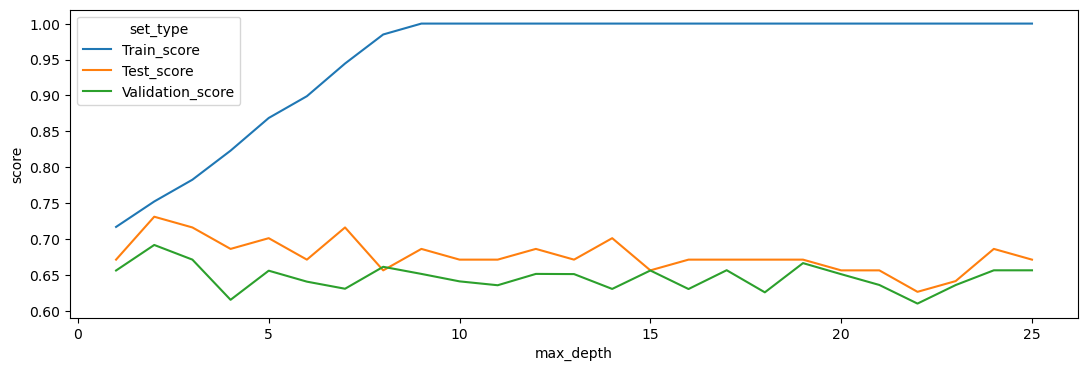

In [10]:
# Зададим диапазон исследуемых значений.
max_depth_values = range(1, 26)
scores_iris_data = pd.DataFrame()
rs = np.random.seed(17)
scores_data=pd.DataFrame()

for max_depth in max_depth_values:
    # Изменяем глубину обучения дерева по циклу от 1 до 50 с шагом 1.
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
    # Обучаем дерево решений (с ограниченной глубиной) на подмножестве train.
    clf.fit(X_train, y_train)
    # Записываем в отдельную переменную число правильных ответов на обученной модели дерева
    train_score = clf.score(X_train, y_train)
    No_validation_score = clf.score(X_test, y_test)
    # Записываем в отдельную переменную число правильных ответов на обученной модели дерева
    test_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    # Создаем временный DataFrame.
    temp_score_data = pd.DataFrame({'max_depth':[max_depth],
                                    'Train_score':[train_score],
                                    'Test_score':[No_validation_score],  
                                    'Validation_score':[test_val_score]})
    # Наращиваем DataFrame "scores_iris_data".
    scores_data = scores_data.append(temp_score_data)

fig = plt.figure(figsize = (13, 4))
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],
                           value_vars=['Train_score','Test_score','Validation_score'],
                           var_name='set_type', value_name='score')
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long);

In [11]:
#Подбор лучших параметров:
par = {'max_depth':range(1, 8), 'min_samples_split':range(2, 6),
     'min_samples_leaf':range(2, 6)}
search = GridSearchCV(clf,par,cv=5)
search.fit(X_train, y_train)
search.best_params_

{'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 3}

Точность модели на обучающей выборке:  0.86
Точность модели на тестовой выборке:  0.7
F1 score: 0.7560975609756098
Recall: 0.7045454545454546
Precision: 0.8157894736842105

 clasification report:
               precision    recall  f1-score   support

           0       0.55      0.70      0.62        23
           1       0.82      0.70      0.76        44

    accuracy                           0.70        67
   macro avg       0.68      0.70      0.69        67
weighted avg       0.73      0.70      0.71        67

Матрица несоответствий метода "Дерево решений":



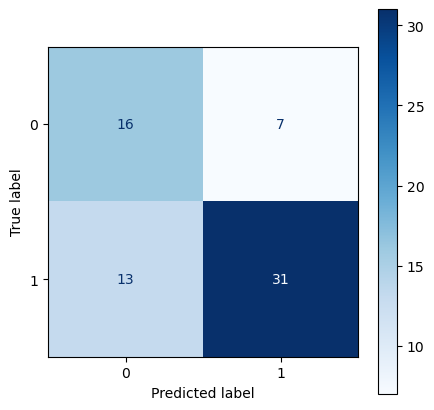

In [12]:
clf_best = search.best_estimator_
train_accuracy = clf_best.score(X_train, y_train)
test_accuracy = clf_best.score(X_test, y_test)
print ('Точность модели на обучающей выборке: ', round (train_accuracy, 2))
print ('Точность модели на тестовой выборке: ', round (test_accuracy, 2))

print ('F1 score:', f1_score(y_test, clf_best.predict(X_test)))
print ('Recall:', recall_score(y_test, clf_best.predict(X_test)))
print ('Precision:', precision_score(y_test, clf_best.predict(X_test)))
print ('\n clasification report:\n', classification_report(y_test, clf_best.predict(X_test)))

print('Матрица несоответствий метода "Дерево решений":\n')
fig, ax = plt.subplots(figsize=(5, 5))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, clf_best.predict(X_test)))
disp.plot(cmap = 'Blues', ax=ax);


#### Высокий precision в данном случае означает то, что практически все найденные больные реально больные

#### Высокий recall в данном случае означает то, что практически все больные найдены

Определим важность фичей:

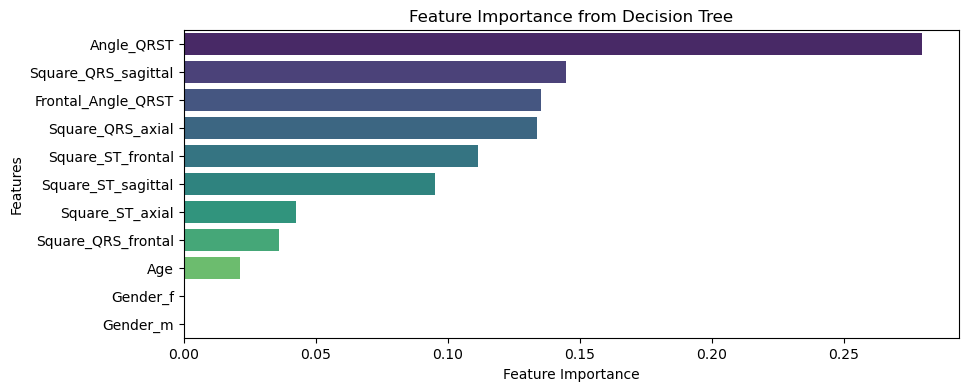

In [13]:
# features - список названий ваших фичей
features = list(X.columns)

# importances - список важности для каждой фичи
importances = clf_best.feature_importances_

# Создаем DataFrame для удобства визуализации
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Сортируем DataFrame по значению важности
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Настройки визуализации
plt.figure(figsize=(10, 4))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Decision Tree')
plt.show()

__Итог:__  <br/>
accuracy = 70%  <br/>
f1 = 76%  <br/>
weighted avg f1 = 71%



## Random Forest

Бэггинг позволяет снизить дисперсию (variance) обучаемого классификатора, уменьшая величину, на сколько ошибка будет отличаться, если обучать модель на разных наборах данных, или другими словами, предотвращает переобучение. 

С помощью кросс-валидации я определяю лучшие гиперпараметры а потом согласно ним провожу оценку на тесте

In [14]:
clf = RandomForestClassifier(random_state=17)
par = {'n_estimators': range(13, 20), 'max_depth' : range(3, 10), 
     'min_samples_split' : range(2, 7),
     'min_samples_leaf': range(1,5)}
search = GridSearchCV(clf, par, cv=5, n_jobs=-1)
search.fit(X_train, y_train)
search.best_params_

{'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 18}

Точность модели на обучающей выборке:  1.0
Точность модели на тестовой выборке:  0.7

 clasification report:
               precision    recall  f1-score   support

           0       0.58      0.48      0.52        23
           1       0.75      0.82      0.78        44

    accuracy                           0.70        67
   macro avg       0.66      0.65      0.65        67
weighted avg       0.69      0.70      0.69        67

Матрица несоответствий метода "Случайный лес":


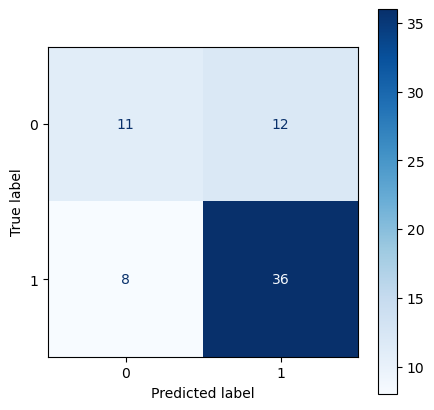

In [15]:
clf_best_rf = search.best_estimator_
clf_best_rf.fit(X_train, y_train)

train_accuracy_rf = clf_best_rf.score(X_train, y_train)
test_accuracy_rf = clf_best_rf.score(X_test, y_test)
print ('Точность модели на обучающей выборке: ', round (train_accuracy_rf, 2))
print ('Точность модели на тестовой выборке: ', round (test_accuracy_rf, 2))

print ('\n clasification report:\n', classification_report(y_test, clf_best_rf.predict(X_test)))

print('Матрица несоответствий метода "Случайный лес":')
fig, ax = plt.subplots(figsize=(5, 5))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, clf_best_rf.predict(X_test)))
disp.plot(cmap = 'Blues', ax=ax);

__Итог:__  <br/>
accuracy = 70%  <br/>
f1 = 78%  <br/>
weighted avg f1 = 69%

## Логистическая регрессия

Точность модели на обучающей выборке:  0.74
Точность модели на тестовой выборке:  0.75
F1 score: 0.8089887640449439
Recall: 0.8181818181818182
Precision: 0.8

 clasification report:
               precision    recall  f1-score   support

           0       0.64      0.61      0.62        23
           1       0.80      0.82      0.81        44

    accuracy                           0.75        67
   macro avg       0.72      0.71      0.72        67
weighted avg       0.74      0.75      0.74        67

Матрица несоответствий метода "Логистическая регрессия":


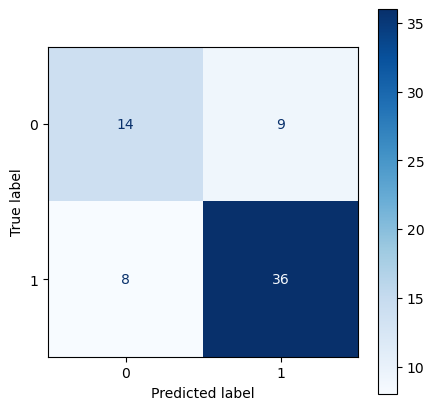

In [16]:
LR_model = LogisticRegression(solver='liblinear')
# Обучим модель на обучающей выборке
LR_model.fit(X_train, y_train) 
# Предскажем класс тестовой выборки
LR_prediction = LR_model.predict(X_test) 

LR_train_accuracy = LR_model.score(X_train, y_train)
LR_test_accuracy = LR_model.score(X_test, y_test)
print ('Точность модели на обучающей выборке: ', round (LR_train_accuracy, 2))
print ('Точность модели на тестовой выборке: ', round (LR_test_accuracy, 2))

print ('F1 score:', f1_score(y_test, LR_model.predict(X_test)))
print ('Recall:', recall_score(y_test, LR_model.predict(X_test)))
print ('Precision:', precision_score(y_test, LR_model.predict(X_test)))
print ('\n clasification report:\n', classification_report(y_test, LR_model.predict(X_test)))

print('Матрица несоответствий метода "Логистическая регрессия":')
fig, ax = plt.subplots(figsize=(5, 5))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, LR_model.predict(X_test)))
disp.plot(cmap = 'Blues', ax=ax);

Для модели логистической регрессии важность фичей можно оценить на основе абсолютных значений коэффициентов, которые модель присваивает каждому признаку. Большие абсолютные значения коэффициентов обычно указывают на более важные признаки.

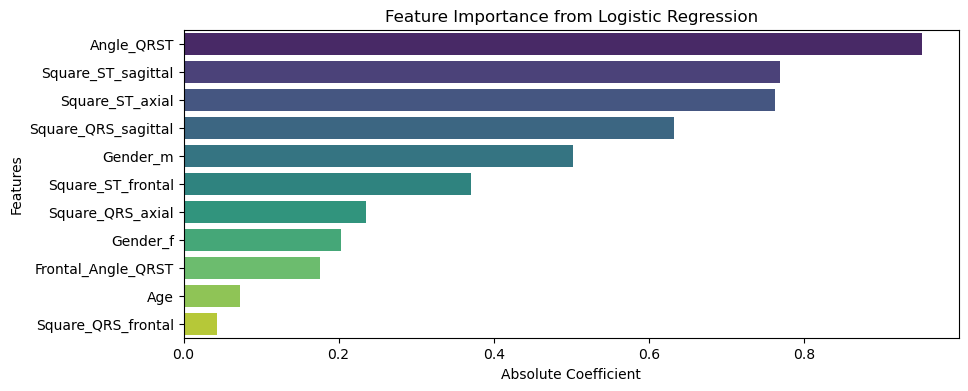

In [17]:
# Получаем коэффициенты модели
coefficients = LR_model.coef_[0]

# Список названий фичей
feature_names = X_train.columns.tolist()

# Создаем DataFrame для удобства визуализации
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Сортируем DataFrame по абсолютному значению коэффициентов
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Визуализация
plt.figure(figsize=(10, 4))
sns.barplot(x='Abs_Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Features')
plt.title('Feature Importance from Logistic Regression')
plt.show()

__Итог:__  <br/>
accuracy = 75%  <br/>
f1 = 81%  <br/>
weighted avg f1 = 74%

## KNN

In [18]:
clf = KNeighborsClassifier()
par = {'n_neighbors': range(1, 15)}
search = GridSearchCV(clf, par, cv=5, n_jobs=-1)
search.fit(X_train, y_train)
search.best_params_

{'n_neighbors': 7}

Точность модели на обучающей выборке:  0.74
Точность модели на тестовой выборке:  0.7

 clasification report:
               precision    recall  f1-score   support

           0       0.55      0.74      0.63        23
           1       0.83      0.68      0.75        44

    accuracy                           0.70        67
   macro avg       0.69      0.71      0.69        67
weighted avg       0.74      0.70      0.71        67

Матрица несоответствий метода "KNN":


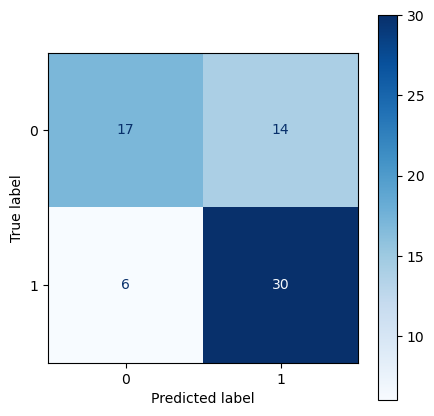

In [19]:
KNN_model = KNeighborsClassifier(n_neighbors = 7)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)

KNN_train_accuracy = KNN_model.score(X_train, y_train)
KNN_test_accuracy = KNN_model.score(X_test, y_test)
print ('Точность модели на обучающей выборке: ', round (KNN_train_accuracy, 2))
print ('Точность модели на тестовой выборке: ', round (KNN_test_accuracy, 2))

print ('\n clasification report:\n', classification_report(y_test, KNN_model.predict(X_test)))

fig, ax = plt.subplots(figsize=(5, 5))
print('Матрица несоответствий метода "KNN":')
disp = ConfusionMatrixDisplay(confusion_matrix(KNN_prediction, y_test))
disp.plot(cmap = 'Blues', ax=ax);

Дополнительно оценим важность фичей для KNN-модели с помощью метода Permutation Importance, который перетасовывает значения одного признака в тестовой выборке и измеряет, как это влияет на точность модели

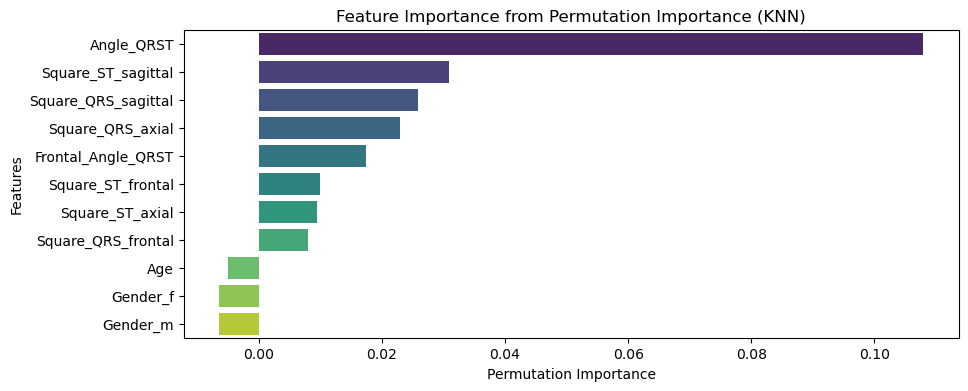

In [21]:
from sklearn.inspection import permutation_importance

# Вычисление перестановочной важности
perm_importance = permutation_importance(KNN_model, X_test, y_test, n_repeats=30, random_state=0)

# Список названий фичей
feature_names = X_train.columns.tolist()

# Создаем DataFrame для удобства визуализации
perm_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': perm_importance.importances_mean})

# Сортируем DataFrame по важности
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

# Визуализация
plt.figure(figsize=(10, 4))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df, palette='viridis')
plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Permutation Importance (KNN)')
plt.show()


__Итог:__  <br/>
accuracy = 70%  <br/>
f1 = 75%  <br/>
weighted avg f1 = 71%

## SVM - Метод опорных векторов

In [22]:
clf = SVC()
par={'degree': range(1,15)}
search=GridSearchCV(clf, par, cv=5, n_jobs=-1)
search.fit(X_train, y_train)
search.best_params_

{'degree': 1}

Точность модели на обучающей выборке:  0.74
Точность модели на тестовой выборке:  0.73

 clasification report:
               precision    recall  f1-score   support

           0       0.62      0.57      0.59        23
           1       0.78      0.82      0.80        44

    accuracy                           0.73        67
   macro avg       0.70      0.69      0.70        67
weighted avg       0.73      0.73      0.73        67

Матрица несоответствий метода опорных векторов:


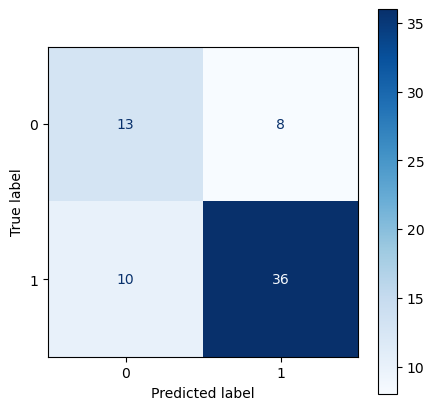

In [26]:
SVC_model = SVC(gamma='scale', kernel='poly', degree=1) 
SVC_model.fit(X_train, y_train)
SVC_prediction = SVC_model.predict(X_test) 

SVC_train_accuracy = SVC_model.score(X_train, y_train)
SVC_test_accuracy = SVC_model.score(X_test, y_test)
print ('Точность модели на обучающей выборке: ', round (SVC_train_accuracy, 2))
print ('Точность модели на тестовой выборке: ', round (SVC_test_accuracy, 2))

print ('\n clasification report:\n', classification_report(y_test, SVC_model.predict(X_test)))

fig, ax = plt.subplots(figsize=(5, 5))
print('Матрица несоответствий метода опорных векторов:')
disp = ConfusionMatrixDisplay(confusion_matrix(SVC_prediction, y_test))
disp.plot(cmap = 'Blues', ax=ax);

__Итог:__  <br/>
accuracy = 73%  <br/>
f1 = 80%  <br/>
weighted avg f1 = 73%

## Градиентный бустинг - CatBoostClassifier

In [31]:
# Создаем модель CatBoost
catboost_model = CatBoostClassifier()

# Определяем сетку параметров для поиска
param_grid = {
    'depth': [3, 5, 7],             # пример значений глубины деревьев
    'learning_rate': [0.01, 0.1],  # пример значений скорости обучения
    'iterations': [100, 200, 300]       # пример значений числа деревьев
}

# Инициализируем GridSearchCV
search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=5, n_jobs=-1)

# Производим поиск наилучших параметров
search.fit(X_train, y_train, verbose_eval=False)

# Выводим наилучшие параметры
print("Наилучшие параметры:", search.best_params_)

Наилучшие параметры: {'depth': 3, 'iterations': 200, 'learning_rate': 0.1}


Точность модели на обучающей выборке: 1.0
Точность модели на тестовой выборке: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.65      0.64        23
           1       0.81      0.80      0.80        44

    accuracy                           0.75        67
   macro avg       0.72      0.72      0.72        67
weighted avg       0.75      0.75      0.75        67

Матрица несоответствий метода градиентного бустинга:


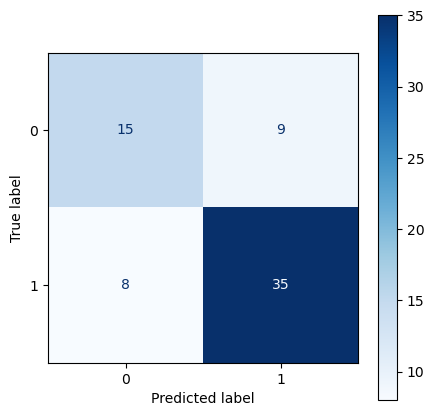

In [35]:
# Создаем модель CatBoost
catboost_model = CatBoostClassifier(iterations=200,  # Например, начнем с 100 деревьев
                                    depth=3,
                                    learning_rate=0.1,
                                    loss_function='Logloss',
                                    random_seed=42,
                                    verbose=200)

# Обучаем модель на обучающей выборке
catboost_model.fit(X_train, y_train, verbose_eval=False)

# Предсказываем классы на тестовой выборке
catboost_predictions = catboost_model.predict(X_test)

# Вычисляем точность модели на обучающей выборке
catboost_train_accuracy = catboost_model.score(X_train, y_train)

# Вычисляем точность модели на тестовой выборке
catboost_test_accuracy = catboost_model.score(X_test, y_test)

# Выводим точность на обучающей и тестовой выборках
print('Точность модели на обучающей выборке:', round(catboost_train_accuracy, 2))
print('Точность модели на тестовой выборке:', round(catboost_test_accuracy, 2))

# Выводим отчет о классификации
print('\nClassification Report:\n', classification_report(y_test, catboost_predictions))

fig, ax = plt.subplots(figsize=(5, 5))
print('Матрица несоответствий метода градиентного бустинга:')
disp = ConfusionMatrixDisplay(confusion_matrix(catboost_predictions, y_test))
disp.plot(cmap = 'Blues', ax=ax);

__Итог:__  <br/>
accuracy = 75%  <br/>
f1 = 80%  <br/>
weighted avg f1 = 75%

## ВЫВОД:
__Лучшие результаты показали модель градиентного бустинга, достигнув результатов accuracy = 75%, f1 = 80%, weighted avg f1 = 75% и модель логистической регрессии, которая достигла на тесте accuracy = 75%, f1 = 81% и weighted avg f1 = 74%.__

---

# Вычислению значения фракции левого желудочка (задача регресии)

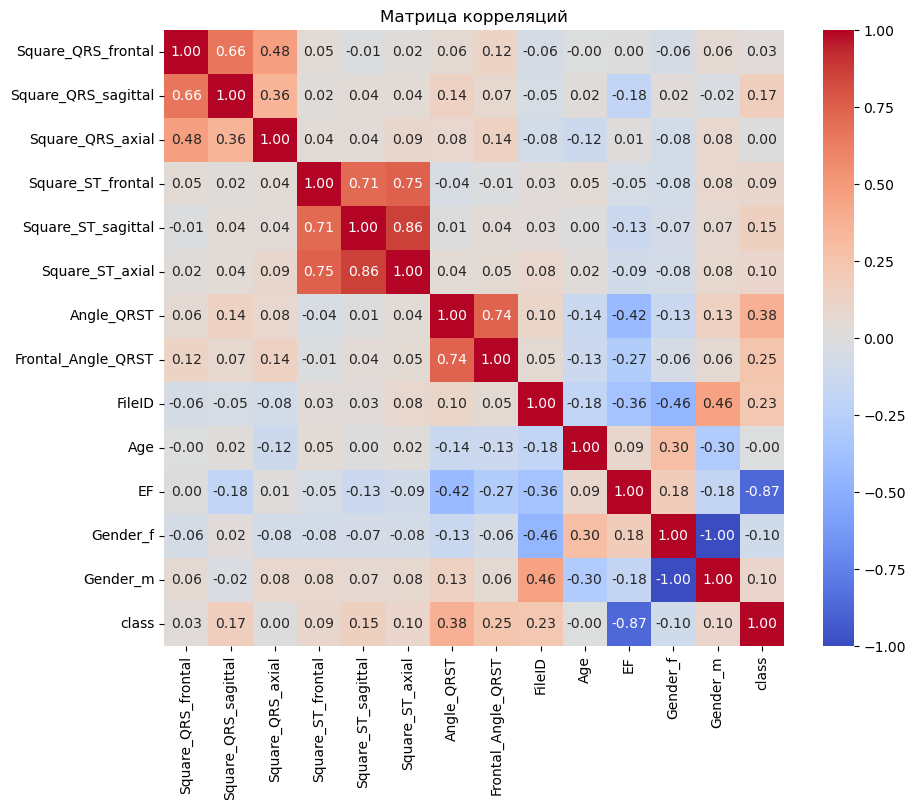

In [69]:
# Создаем тепловую карту
correlation_matrix = df[df.columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций')
plt.show()

In [70]:
y = df['EF']
X = df.drop(['FileID', 'class', 'EF'], axis=1)
print(f"Анализируются следующие {len(list(X.columns))} признаков: {list(X.columns)}")

Анализируются следующие 11 признаков: ['Square_QRS_frontal', 'Square_QRS_sagittal', 'Square_QRS_axial', 'Square_ST_frontal', 'Square_ST_sagittal', 'Square_ST_axial', 'Angle_QRST', 'Frontal_Angle_QRST', 'Age', 'Gender_f', 'Gender_m']


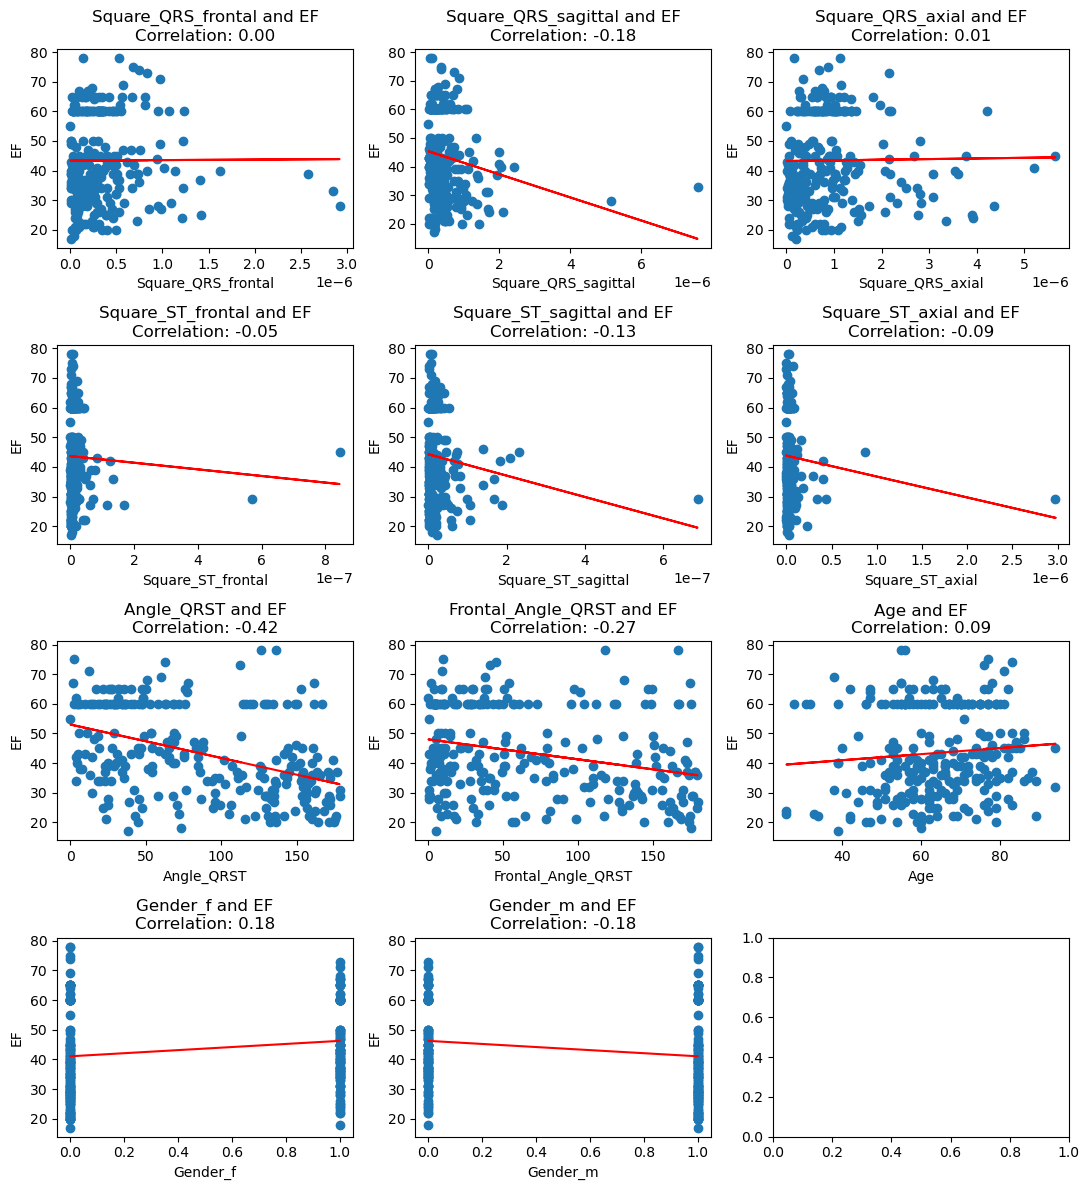

In [85]:
from scipy.stats import pearsonr

# Выберите столбец для сравнения
column_to_compare = y

# Создаем сетку графиков
num_columns = 3  # Количество столбцов в сетке
num_rows = (len(X.columns) + num_columns - 1) // num_columns  # Количество строк в сетке

fig, axes = plt.subplots(num_rows, num_columns, figsize=(11, 3 * num_rows))
axes = axes.flatten()

for idx, column in enumerate(X.columns):
    ax = axes[idx]
    ax.scatter(X[column], column_to_compare)
    
    # Вычисляем коэффициент корреляции
    correlation_coefficient, _ = pearsonr(X[column], column_to_compare)
    
    # Рисуем линию корреляции
    fit = np.polyfit(X[column], column_to_compare, 1)
    fit_fn = np.poly1d(fit)
    ax.plot(X[column], fit_fn(X[column]), color='red')
    
    ax.set_xlabel(column)
    ax.set_ylabel('EF')
    ax.set_title(f'{column} and EF\nCorrelation: {correlation_coefficient:.2f}')


plt.tight_layout()
plt.show()

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Выделим признаки для нормализации
features_to_normalize = ['Square_QRS_frontal', 'Square_QRS_sagittal', 'Square_QRS_axial', 
                         'Square_ST_frontal', 'Square_ST_sagittal', 'Square_ST_axial', 
                         'Angle_QRST', 'Frontal_Angle_QRST', 'Age']

# Создадим объект для стандартизации и подгоним его на тренировочных данных
scaler = StandardScaler()
scaler.fit(X_train[features_to_normalize])


with warnings.catch_warnings():
    # Отключаем предупреждения типа SettingWithCopyWarning
    warnings.simplefilter("ignore", category=SettingWithCopyWarning)

    # Нормализуем признаки на тренировочном и валидационном наборах
    X_train[features_to_normalize] = scaler.transform(X_train[features_to_normalize])
    X_test[features_to_normalize] = scaler.transform(X_test[features_to_normalize])

## Градиентный бустинг - CatBoostRegressor

Наилучшие параметры: {'depth': 6, 'iterations': 200, 'learning_rate': 0.05}
Среднеквадратичная ошибка (MSE): 125.14443678401148
Средняя абсолютная ошибка (MAE): 9.236442179324584


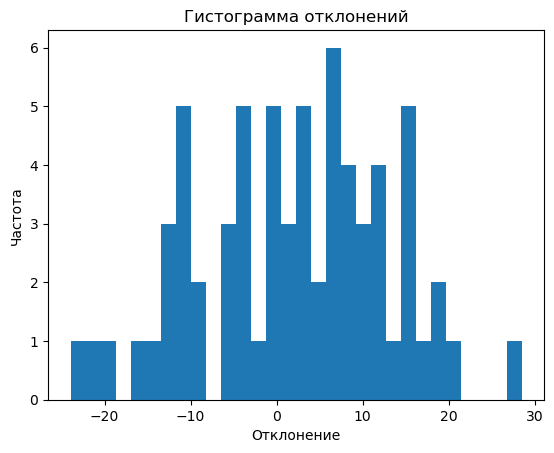

In [64]:
# Создаем модель CatBoostRegressor
catboost_regressor = CatBoostRegressor()

# Определяем сетку параметров для поиска
param_grid = {
    'depth': [3, 4, 5, 6],             # пример значений глубины деревьев
    'learning_rate': [0.05, 0.1],  # пример значений скорости обучения
    'iterations': [150, 200, 250]       # пример значений числа деревьев
}

# Инициализируем GridSearchCV
search = GridSearchCV(estimator=catboost_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

# Производим поиск наилучших параметров
search.fit(X_train, y_train, verbose_eval=False)

# Выводим наилучшие параметры
print("Наилучшие параметры:", search.best_params_)

# Создаем модель CatBoostRegressor с наилучшими параметрами
best_catboost_regressor = CatBoostRegressor(**search.best_params_)

# Обучаем модель на обучающей выборке
best_catboost_regressor.fit(X_train, y_train, verbose_eval=False)

# Предсказываем значения на тестовой выборке
catboost_predictions = best_catboost_regressor.predict(X_test)

# Вычисляем среднеквадратичную ошибку на тестовой выборке
mse = mean_squared_error(y_test, catboost_predictions)

# Выводим среднеквадратичную ошибку
print('Среднеквадратичная ошибка (MSE):', mse)

# Вычисляем среднюю абсолютную ошибку (MAE)
mae = mean_absolute_error(y_test, catboost_predictions)
print('Средняя абсолютная ошибка (MAE):', mae)

# Строим гистограмму отклонений
errors = y_test - catboost_predictions
plt.hist(errors, bins=30)
plt.xlabel('Отклонение')
plt.ylabel('Частота')
plt.title('Гистограмма отклонений')
plt.show()

Среднеквадратичная ошибка линейной регрессии (MSE): 160.9698834021293
Средняя абсолютная ошибка линейной регрессии (MAE): 10.409679953298255


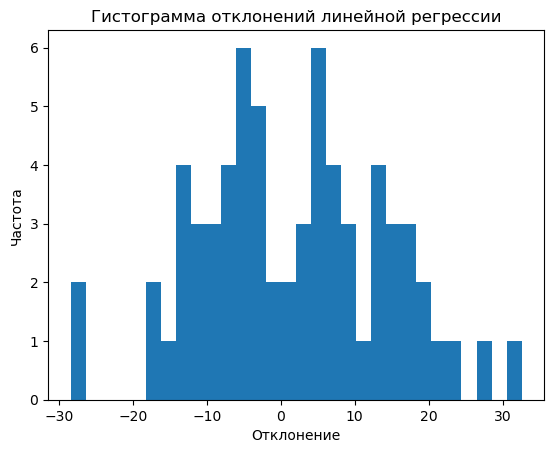

In [89]:
# Обучаем линейную регрессию
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Предсказываем значения на тестовой выборке с помощью линейной регрессии
linear_predictions = linear_regressor.predict(X_test)

# Вычисляем среднеквадратичную ошибку на тестовой выборке для линейной регрессии
mse_linear = mean_squared_error(y_test, linear_predictions)
print('Среднеквадратичная ошибка линейной регрессии (MSE):', mse_linear)

# Вычисляем среднюю абсолютную ошибку (MAE) для линейной регрессии
mae_linear = mean_absolute_error(y_test, linear_predictions)
print('Средняя абсолютная ошибка линейной регрессии (MAE):', mae_linear)

# Строим гистограмму отклонений для линейной регрессии
errors_linear = y_test - linear_predictions
plt.hist(errors_linear, bins=30)
plt.xlabel('Отклонение')
plt.ylabel('Частота')
plt.title('Гистограмма отклонений линейной регрессии')
plt.show()

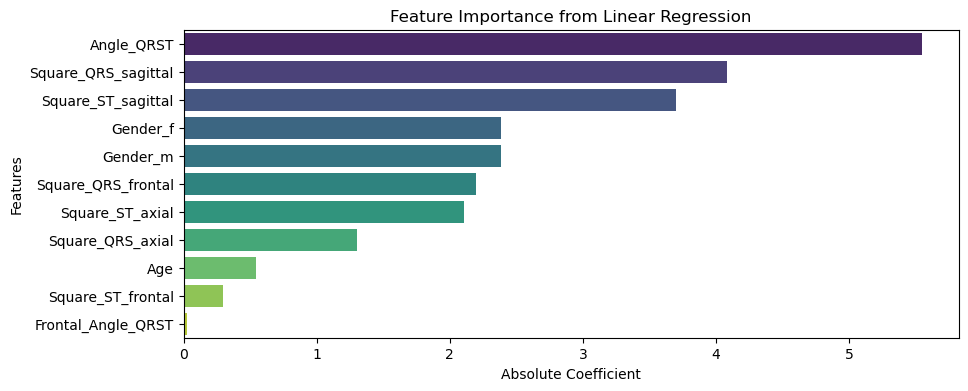

In [90]:
# Получаем коэффициенты модели
coefficients = linear_regressor.coef_

# Список названий фичей
feature_names = X_train.columns.tolist()

# Создаем DataFrame для удобства визуализации
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Сортируем DataFrame по абсолютному значению коэффициентов
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Визуализация
plt.figure(figsize=(10, 4))
sns.barplot(x='Abs_Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Features')
plt.title('Feature Importance from Linear Regression')
plt.show()


## ВЫВОД:
__Лучшие результаты показала модель градиентного бустинга, достигнув результатов MAE=9.2. Было определено, что пространсвенный угол QRST во всех исследованных методах регрессии и классификации имеет самую высокую значимость в финальной оценке__